C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


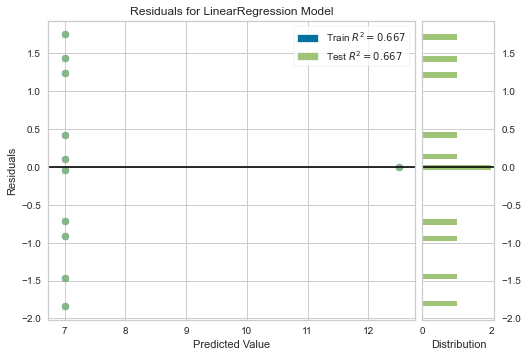

In [1]:
# Plotting Anscombe residuals
import seaborn as sns
from sklearn import linear_model
from yellowbrick.regressor import residuals_plot
import pandas as pd

anscombe_df = sns.load_dataset("anscombe")
x_values = pd.DataFrame(anscombe_df.iloc[33:]["x"])
y_values = anscombe_df.iloc[33:]["y"]

model = linear_model.LinearRegression()
viz = residuals_plot(model, x_values, y_values)

### Wine Dataset

In [2]:
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df.insert(13, "class", wine_data.target)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
# Use linear regression
import numpy as np
from sklearn.metrics import r2_score

# Function to create a mask of true or false for values that are less than .7 (our 70 % mark)
def create_training_test(incoming_df):
    mask = np.random.rand(len(incoming_df)) < 0.7

    training_set = incoming_df[mask]
    test_set = incoming_df[~mask]
    return training_set, test_set  
    
# Split the data into training/testing sets
training_data, test_data = create_training_test(wine_df)

x_train = training_data.iloc[:,0:13]
x_test = test_data.iloc[:,0:13]

y_train = training_data.iloc[:,13]
y_test = test_data.iloc[:,13]

# Create linear regression object
reg_object = linear_model.LinearRegression()

# Train model
reg_object.fit(x_train, y_train)

# Make predictions
y_predicted = reg_object.predict(x_test)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predicted))

print('Y intercept: ',reg_object.intercept_)

Coefficient of determination (r2): 0.92
Y intercept:  3.127860544600667


### Experiment with Cross Validation

In [4]:
from sklearn.model_selection import cross_val_score

# Getting all data with no train-test split
x_data = wine_df.iloc[:,0:13]
y_data = wine_df.iloc[:,13]

reg_object_cross = linear_model.LinearRegression()

# 2 Fold Validation
print("2 Fold Validation Scores: ", cross_val_score(reg_object_cross, x_data, y=y_data, cv=2))

# 3 Fold Validation
print("3 Fold Validation Scores: ", cross_val_score(reg_object_cross, x_data, y=y_data, cv=3))

# 5 Fold Validation
print("5 Fold Validation Scores: ", cross_val_score(reg_object_cross, x_data, y=y_data, cv=5))

2 Fold Validation Scores:  [-4.56601016 -1.77884505]
3 Fold Validation Scores:  [-73.46648267   0.          -6.64995487]
5 Fold Validation Scores:  [0.         0.51460008 0.         0.40252695 0.        ]


#### Findings
So after looking up what the large negative scores meant, I see that the evaluation did not perform well at lower folds, like 2 and 3. At 5 folds, the evaluation started to do better with decent results. Still, the single training-test split did much better than the k-Fold validation.

### Adding Polynomial features

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Adding polynomial of 2
poly_2 = PolynomialFeatures(2)

x_train_2 = poly_2.fit_transform(x_train)
x_test_2 = poly_2.fit_transform(x_test)

# Create linear regression object
reg_object_2 = linear_model.LinearRegression()

# Train model
reg_object_2.fit(x_train_2, y_train)

# Make predictions
y_predicted_2 = reg_object_2.predict(x_test_2)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predicted_2))

print('Y intercept: ',reg_object_2.intercept_)

Coefficient of determination (r2): 0.82
Y intercept:  18349323.84835532


In [6]:
# Adding polynomial of 4
poly_4 = PolynomialFeatures(4)

x_train_4 = poly_4.fit_transform(x_train)
x_test_4 = poly_4.fit_transform(x_test)

# Create linear regression object
reg_object_4 = linear_model.LinearRegression()

# Train model
reg_object_4.fit(x_train_4, y_train)

# Make predictions
y_predicted_4 = reg_object_4.predict(x_test_4)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predicted_4))

print('Y intercept: ',reg_object_4.intercept_)

Coefficient of determination (r2): 0.16
Y intercept:  0.12364295970147754


In [7]:
# Adding polynomial of 5
poly_5 = PolynomialFeatures(5)

x_train_5 = poly_5.fit_transform(x_train)
x_test_5 = poly_5.fit_transform(x_test)

# Create linear regression object
reg_object_5 = linear_model.LinearRegression()

# Train model
reg_object_5.fit(x_train_5, y_train)

# Make predictions
y_predicted_5 = reg_object_5.predict(x_test_5)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predicted_5))

print('Y intercept: ',reg_object_5.intercept_)

Coefficient of determination (r2): -0.59
Y intercept:  0.5153811514679169


### Findings
The model seemed to not respond well to higher degrees of polynomial transformation. The best one that performed was polynomial of 2. Still the regular model with normal data has been the best so far.

### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

# Alpha of 0.0
ridge_0 = Ridge(alpha=0.0)

# Fitting on 2 poly data
ridge_0.fit(x_train_2, y_train)

y_predict = ridge_0.predict(x_test_2)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_0.intercept_)

# Fitting on 4 poly data
ridge_0.fit(x_train_4, y_train)

y_predict = ridge_0.predict(x_test_4)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_0.intercept_)

# Fitting on 5 poly data
ridge_0.fit(x_train_5, y_train)

y_predict = ridge_0.predict(x_test_5)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_0.intercept_)

Coefficient of determination (r2): 0.79
Y intercept:  146794197.45958355
Coefficient of determination (r2): 0.44
Y intercept:  -0.17504662412327232
Coefficient of determination (r2): -0.13
Y intercept:  0.6219646901339891


C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [9]:
# Alpha of 1.0

ridge_1 = Ridge(alpha=1.0)

# Fitting on 2 poly data
ridge_1.fit(x_train_2, y_train)

y_predict = ridge_1.predict(x_test_2)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_1.intercept_)

# Fitting on 4 poly data
ridge_1.fit(x_train_4, y_train)

y_predict = ridge_1.predict(x_test_4)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_1.intercept_)

# Fitting on 5 poly data
ridge_1.fit(x_train_5, y_train)

y_predict = ridge_1.predict(x_test_5)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_1.intercept_)

Coefficient of determination (r2): 0.90
Y intercept:  1.980231683292982
Coefficient of determination (r2): 0.44
Y intercept:  -0.17504662412327232
Coefficient of determination (r2): -0.13
Y intercept:  0.6219646901339891


C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [10]:
# Alpha of 5.0

ridge_5 = Ridge(alpha=5.0)

# Fitting on 2 poly data
ridge_5.fit(x_train_2, y_train)

y_predict = ridge_5.predict(x_test_2)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_5.intercept_)

# Fitting on 4 poly data
ridge_5.fit(x_train_4, y_train)

y_predict = ridge_5.predict(x_test_4)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_5.intercept_)

# Fitting on 5 poly data
ridge_5.fit(x_train_5, y_train)

y_predict = ridge_5.predict(x_test_5)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

print('Y intercept: ',ridge_5.intercept_)

Coefficient of determination (r2): 0.93
Y intercept:  3.4872615050315154
Coefficient of determination (r2): 0.44
Y intercept:  -0.17504662412327232
Coefficient of determination (r2): -0.13
Y intercept:  0.6219646901339891


C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


#### Findings
Regularization helped quite a bit with bringing the scores into acceptable ranges from what they were before. Polynomial of 2 was actually able to get better results than the original linear model when fitted with an alpha of 5 for the ridge regression. One thing noted is that poly of 4 and 5 seemed to level out regardless of alpha. The alphas did make a change in their results but going from one alpha to a higher one did not affect their results further.

#### Model Coefficients

In [11]:
print("Ridge Coefs: ",ridge_5.coef_)
print("Linear Coefs: ",reg_object.coef_)

Ridge Coefs:  [ 0.00000000e+00  9.45258984e-20  9.02399014e-18 ...  6.73171555e-10
  5.98723799e-12 -2.41242137e-14]
Linear Coefs:  [-1.11964609e-01  3.39804138e-02 -1.95187158e-01  4.09156649e-02
 -2.06206260e-04  1.37490448e-01 -4.01017577e-01 -1.43131731e-01
  4.06820971e-02  8.99460786e-02 -1.03676679e-01 -1.89482800e-01
 -6.86649707e-04]


The coefficients became smaller by a large amount when the data was regularized.